# Comparison with numpy
clEsperanto brings some array / voxel-grid manipulation functions which are also available with numpy. Let's see how numpy performs in comparison with our OpenCL stuff. When doing similar comparisons with ImageJ, we saw more performance benefits when GPU-accelerating 3D operations compared to 2D operations. https://clij.github.io/clij-benchmarking/benchmarking_operations_jmh

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [1]:
import numpy as np
import pyclesperanto_prototype as cle

import time

In [2]:
cle.select_device("RTX")

<GeForce RTX 2070 on Platform: NVIDIA CUDA (1 refs)>

## Matrix multiplication

In [3]:
# test data
import numpy as np

test_matrix1 = np.random.random([1024, 512])
test_matrix2 = np.random.random([512, 1024])

In [4]:
# multiply with numpy
result_matrix = None

for i in range(0, 10):
    start_time = time.time()
    result_matrix = np.matmul(test_matrix1, test_matrix2, out=result_matrix)
    print("Numpy matrix multiplication duration: " + str(time.time() - start_time))

print(result_matrix.shape)

Numpy matrix multiplication duration: 0.020929813385009766
Numpy matrix multiplication duration: 0.010970830917358398
Numpy matrix multiplication duration: 0.008974790573120117
Numpy matrix multiplication duration: 0.01097416877746582
Numpy matrix multiplication duration: 0.009969711303710938
Numpy matrix multiplication duration: 0.009975194931030273
Numpy matrix multiplication duration: 0.008988618850708008
Numpy matrix multiplication duration: 0.008968830108642578
Numpy matrix multiplication duration: 0.008976459503173828
Numpy matrix multiplication duration: 0.007978200912475586
(1024, 1024)


In [5]:
# multiply with clesperanto
result_matrix = cle.create([1024, 1024])

test_matrix1_gpu = cle.push_zyx(test_matrix1)
test_matrix2_gpu = cle.push_zyx(test_matrix2)

for i in range(0, 10):
    start_time = time.time()
    cle.multiply_matrix(test_matrix1_gpu, test_matrix2_gpu, result_matrix)
    print("clEsperanto matrix multiplication duration: " + str(time.time() - start_time))

print(result_matrix.shape)

clEsperanto matrix multiplication duration: 0.02060556411743164
clEsperanto matrix multiplication duration: 0.0
clEsperanto matrix multiplication duration: 0.00099945068359375
clEsperanto matrix multiplication duration: 0.0
clEsperanto matrix multiplication duration: 0.0
clEsperanto matrix multiplication duration: 0.000997304916381836
clEsperanto matrix multiplication duration: 0.0
clEsperanto matrix multiplication duration: 0.0
clEsperanto matrix multiplication duration: 0.0
clEsperanto matrix multiplication duration: 0.0
(1024, 1024)


## Elementwise multiplication

In [6]:
# test data
import numpy as np

test_image1 = np.random.random([100, 512, 512])
test_image2 = np.random.random([100, 512, 512])

In [7]:
# multiply with numpy
result_image = None

for i in range(0, 10):
    start_time = time.time()
    result_image = np.multiply(test_image1, test_image2)
    print("Numpy elementwise multiplication duration: " + str(time.time() - start_time))
    

Numpy elementwise multiplication duration: 0.05684804916381836
Numpy elementwise multiplication duration: 0.0658559799194336
Numpy elementwise multiplication duration: 0.06283688545227051
Numpy elementwise multiplication duration: 0.06382417678833008
Numpy elementwise multiplication duration: 0.07676291465759277
Numpy elementwise multiplication duration: 0.06786370277404785
Numpy elementwise multiplication duration: 0.07179427146911621
Numpy elementwise multiplication duration: 0.0717778205871582
Numpy elementwise multiplication duration: 0.08380651473999023
Numpy elementwise multiplication duration: 0.07280564308166504


In [8]:
# multiply with pyclesperanto
result_image = None

test_image1_gpu = cle.push_zyx(test_image1)
test_image2_gpu = cle.push_zyx(test_image2)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.multiply_images(test_image1_gpu, test_image2_gpu, result_image)
    print("clEsperanto elementwise multiplication duration: " + str(time.time() - start_time))

clEsperanto elementwise multiplication duration: 0.0069882869720458984
clEsperanto elementwise multiplication duration: 0.001001596450805664
clEsperanto elementwise multiplication duration: 0.0005764961242675781
clEsperanto elementwise multiplication duration: 0.0
clEsperanto elementwise multiplication duration: 0.0009996891021728516
clEsperanto elementwise multiplication duration: 0.0
clEsperanto elementwise multiplication duration: 0.0
clEsperanto elementwise multiplication duration: 0.0009965896606445312
clEsperanto elementwise multiplication duration: 0.0
clEsperanto elementwise multiplication duration: 0.0009975433349609375


In [9]:
# multiply with pyclesperanto while _not_ reusing memory
result_image = None

test_image1_gpu = cle.push_zyx(test_image1)
test_image2_gpu = cle.push_zyx(test_image2)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.multiply_images(test_image1_gpu, test_image2_gpu)
    print("clEsperanto elementwise multiplication duration (+ memory allocation): " + str(time.time() - start_time))

clEsperanto elementwise multiplication duration (+ memory allocation): 0.0041048526763916016
clEsperanto elementwise multiplication duration (+ memory allocation): 0.007761240005493164
clEsperanto elementwise multiplication duration (+ memory allocation): 0.007010698318481445
clEsperanto elementwise multiplication duration (+ memory allocation): 0.0062961578369140625
clEsperanto elementwise multiplication duration (+ memory allocation): 0.00677800178527832
clEsperanto elementwise multiplication duration (+ memory allocation): 0.006331443786621094
clEsperanto elementwise multiplication duration (+ memory allocation): 0.006888628005981445
clEsperanto elementwise multiplication duration (+ memory allocation): 0.006284475326538086
clEsperanto elementwise multiplication duration (+ memory allocation): 0.006586313247680664
clEsperanto elementwise multiplication duration (+ memory allocation): 0.006486415863037109


## Maximum intensity projection in Z

(120, 160, 160)


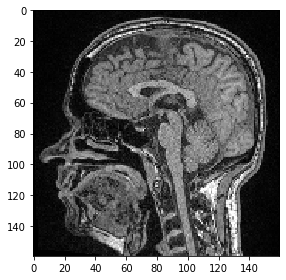

In [10]:
# test data
from skimage.io import imread, imshow

raw_image = imread('../data/Haase_MRT_tfl3d1.tif')

print(raw_image.shape)

imshow(raw_image[60])

Numpy maximum_intensity projection(Z) duration: 0.0029985904693603516
Numpy maximum_intensity projection(Z) duration: 0.0025653839111328125
Numpy maximum_intensity projection(Z) duration: 0.0019614696502685547
Numpy maximum_intensity projection(Z) duration: 0.0039920806884765625
Numpy maximum_intensity projection(Z) duration: 0.0030198097229003906
Numpy maximum_intensity projection(Z) duration: 0.002023458480834961
Numpy maximum_intensity projection(Z) duration: 0.001999378204345703
Numpy maximum_intensity projection(Z) duration: 0.0019931793212890625
Numpy maximum_intensity projection(Z) duration: 0.0019936561584472656
Numpy maximum_intensity projection(Z) duration: 0.0009958744049072266


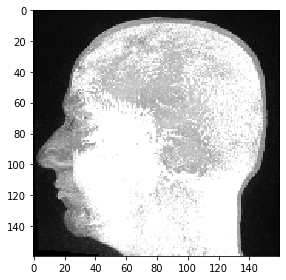

In [11]:
# maximum projection with numpy
result_image = None

test_image = np.asarray(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = np.max(test_image, axis=0, out=result_image)
    print("Numpy maximum_intensity projection(Z) duration: " + str(time.time() - start_time))
    
imshow(result_image)

clEsperanto maximum_intensity projection(Z) duration: 0.0044403076171875
clEsperanto maximum_intensity projection(Z) duration: 0.0020003318786621094
clEsperanto maximum_intensity projection(Z) duration: 0.0009937286376953125
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.0009889602661132812
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.0009965896606445312
clEsperanto maximum_intensity projection(Z) duration: 0.0


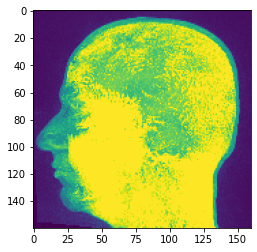

In [12]:
# maximum projection with clesperanto
result_image = None

test_image = cle.push_zyx(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.maximum_z_projection(test_image, result_image)
    print("clEsperanto maximum_intensity projection(Z) duration: " + str(time.time() - start_time))

cle.imshow(result_image)

## Maximum intensity projection in X

Numpy maximum_intensity projection(X) duration: 0.0039920806884765625
Numpy maximum_intensity projection(X) duration: 0.00401616096496582
Numpy maximum_intensity projection(X) duration: 0.002958536148071289
Numpy maximum_intensity projection(X) duration: 0.003997802734375
Numpy maximum_intensity projection(X) duration: 0.003988504409790039
Numpy maximum_intensity projection(X) duration: 0.0029878616333007812
Numpy maximum_intensity projection(X) duration: 0.002988576889038086
Numpy maximum_intensity projection(X) duration: 0.003027200698852539
Numpy maximum_intensity projection(X) duration: 0.0029611587524414062
Numpy maximum_intensity projection(X) duration: 0.003985404968261719


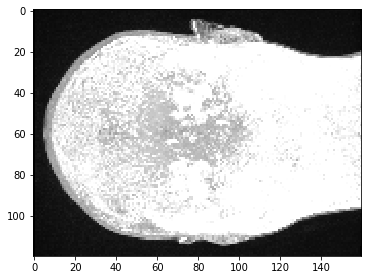

In [13]:
# maximum projection with numpy
result_image = None

test_image = np.asarray(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = np.max(test_image, axis=2, out=result_image)
    print("Numpy maximum_intensity projection(X) duration: " + str(time.time() - start_time))
    
imshow(result_image)

clEsperanto maximum_intensity projection(X) duration: 0.005312442779541016
clEsperanto maximum_intensity projection(X) duration: 0.001013040542602539
clEsperanto maximum_intensity projection(X) duration: 0.0
clEsperanto maximum_intensity projection(X) duration: 0.0009839534759521484
clEsperanto maximum_intensity projection(X) duration: 0.0
clEsperanto maximum_intensity projection(X) duration: 0.0009968280792236328
clEsperanto maximum_intensity projection(X) duration: 0.0009984970092773438
clEsperanto maximum_intensity projection(X) duration: 0.0010077953338623047
clEsperanto maximum_intensity projection(X) duration: 0.0009937286376953125
clEsperanto maximum_intensity projection(X) duration: 0.0009968280792236328


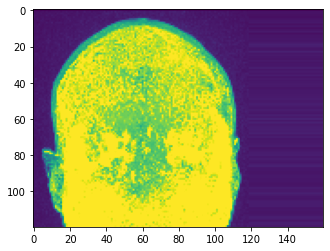

In [14]:
# maximum projection with clesperanto
result_image = None

test_image = cle.push_zyx(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.maximum_x_projection(test_image, result_image)
    print("clEsperanto maximum_intensity projection(X) duration: " + str(time.time() - start_time))

cle.imshow(result_image)

# Comparison operation

In [15]:
# test data
import numpy as np

test_image1 = np.random.random([100, 512, 512])
test_image2 = np.random.random([100, 512, 512])

In [16]:
# comparie with numpy
result_image = None

for i in range(0, 10):
    start_time = time.time()
    result_image = np.greater_equal(test_image1, test_image2)
    print("Numpy greater_equal duration: " + str(time.time() - start_time))
    

Numpy greater_equal duration: 0.03091740608215332
Numpy greater_equal duration: 0.025931596755981445
Numpy greater_equal duration: 0.023935556411743164
Numpy greater_equal duration: 0.02393627166748047
Numpy greater_equal duration: 0.023936033248901367
Numpy greater_equal duration: 0.023935794830322266
Numpy greater_equal duration: 0.02892327308654785
Numpy greater_equal duration: 0.027924776077270508
Numpy greater_equal duration: 0.03391075134277344
Numpy greater_equal duration: 0.03490614891052246


In [17]:
# multiply with pyclesperanto
result_image = None

test_image1_gpu = cle.push_zyx(test_image1)
test_image2_gpu = cle.push_zyx(test_image2)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.greater_or_equal(test_image1_gpu, test_image2_gpu, result_image)
    print("clEsperanto greater_or_equal duration: " + str(time.time() - start_time))

clEsperanto greater_or_equal duration: 0.006064176559448242
clEsperanto greater_or_equal duration: 0.0010042190551757812
clEsperanto greater_or_equal duration: 0.0009953975677490234
clEsperanto greater_or_equal duration: 0.0
clEsperanto greater_or_equal duration: 0.0
clEsperanto greater_or_equal duration: 0.0009965896606445312
clEsperanto greater_or_equal duration: 0.0
clEsperanto greater_or_equal duration: 0.0009970664978027344
clEsperanto greater_or_equal duration: 0.0
clEsperanto greater_or_equal duration: 0.000997304916381836
